In [1]:
import pandas as pd
import numpy as np
import smote_variants as sv
from potnet import *

2025-04-18 13:38:11.496371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745008691.843309    5096 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745008691.921659    5096 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745008692.642361    5096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745008692.642392    5096 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745008692.642394    5096 computation_placer.cc:177] computation placer alr

In [2]:
hf_potnet_model_v3 = load_model('hf_potnet_model_v3.pt')
df = pd.read_csv('data/very_high_downloads.csv')
df.info()

Model loaded from hf_potnet_model_v3.pt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8271 entries, 0 to 8270
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   task_group          8271 non-null   object
 1   author_category     8271 non-null   object
 2   language_category   8271 non-null   object
 3   downloads_category  8271 non-null   object
 4   location            8271 non-null   object
dtypes: object(5)
memory usage: 323.2+ KB


In [8]:
num_samples = 100000
gen_data = hf_potnet_model_v3.generate(num_samples)

In [9]:
gen_data

,task_group,author_category,language_category,downloads_category,location
0,Text Processing,Silver,High,Very high,us
1,Image Processing,Gold,High,Very high,us
2,Text Processing,Silver,High,Very high,us
3,Text Processing,Silver,High,Very high,us
4,Image Processing,Gold,High,Very high,us
...,...,...,...,...,...
99995,Image Processing,Gold,High,Very high,us
99996,Unknown,Gold,High,Very high,us
99997,Image Processing,Gold,High,Very high,us
99998,Text Processing,Gold,High,Very high,us


In [10]:
gen_data.task_group.value_counts()

task_group
Text Processing     72219
Unknown             17335
Image Processing    10446
Name: count, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_distrib(df):
    print(df.downloads_category.value_counts())
    # Create a count plot
    plt.figure(figsize=(14, 8))
    sns.set_theme(style="whitegrid")

    # Create grouped bar chart
    ax = sns.countplot(
        x="task_group",
        hue="downloads_category",
        data=df,
        order=df['task_group'].value_counts().index,
        palette="viridis"
    )

    # Customize plot
    plt.title("Distribution of Download Categories Across Task Groups", fontsize=16, pad=20)
    plt.xlabel("Task Group", fontsize=12)
    plt.ylabel("Count of Models", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    # Add percentage annotations
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3,
                f'{height/total:.1%}',
                ha="center", fontsize=9)

    plt.legend(title="Download Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

downloads_category
Very high    8271
Name: count, dtype: int64


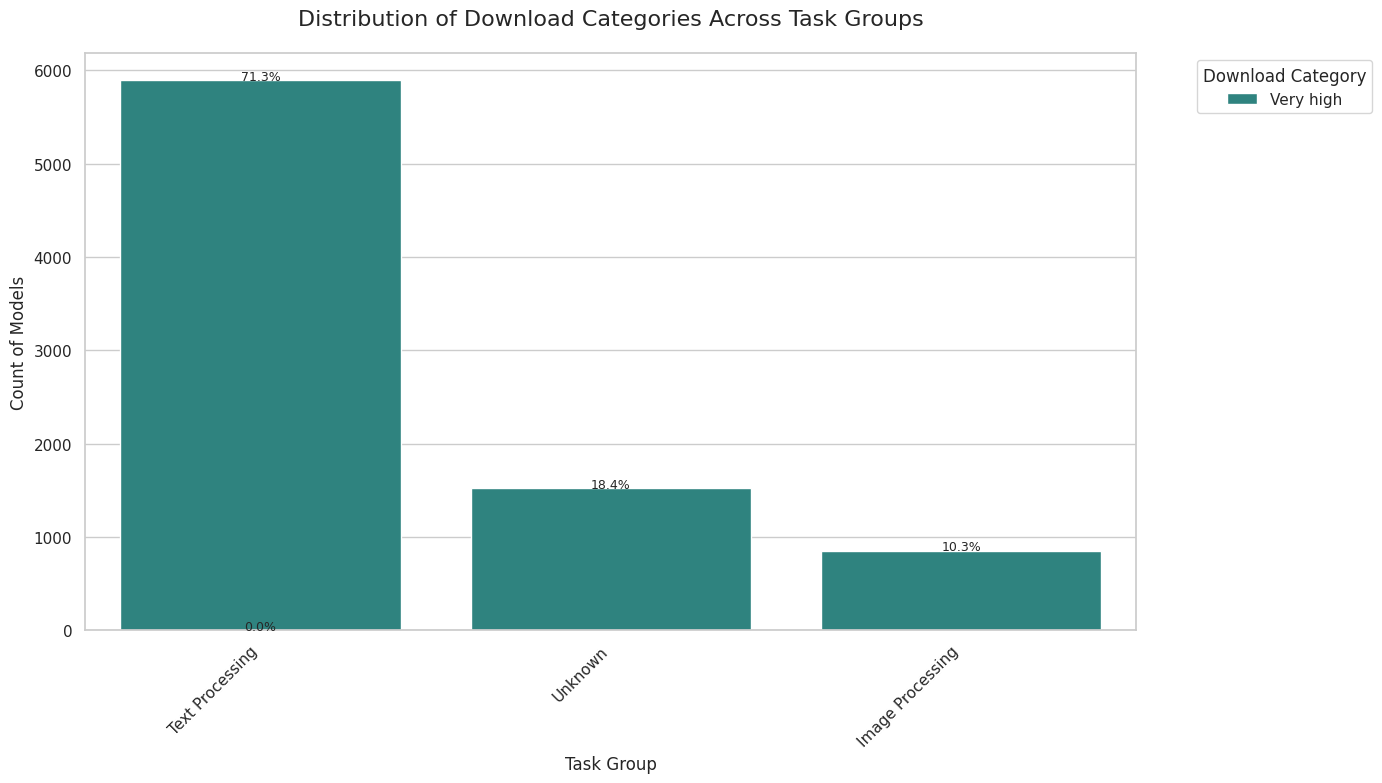

In [31]:
create_distrib(gen_data)

downloads_category
Very high    8271
Name: count, dtype: int64


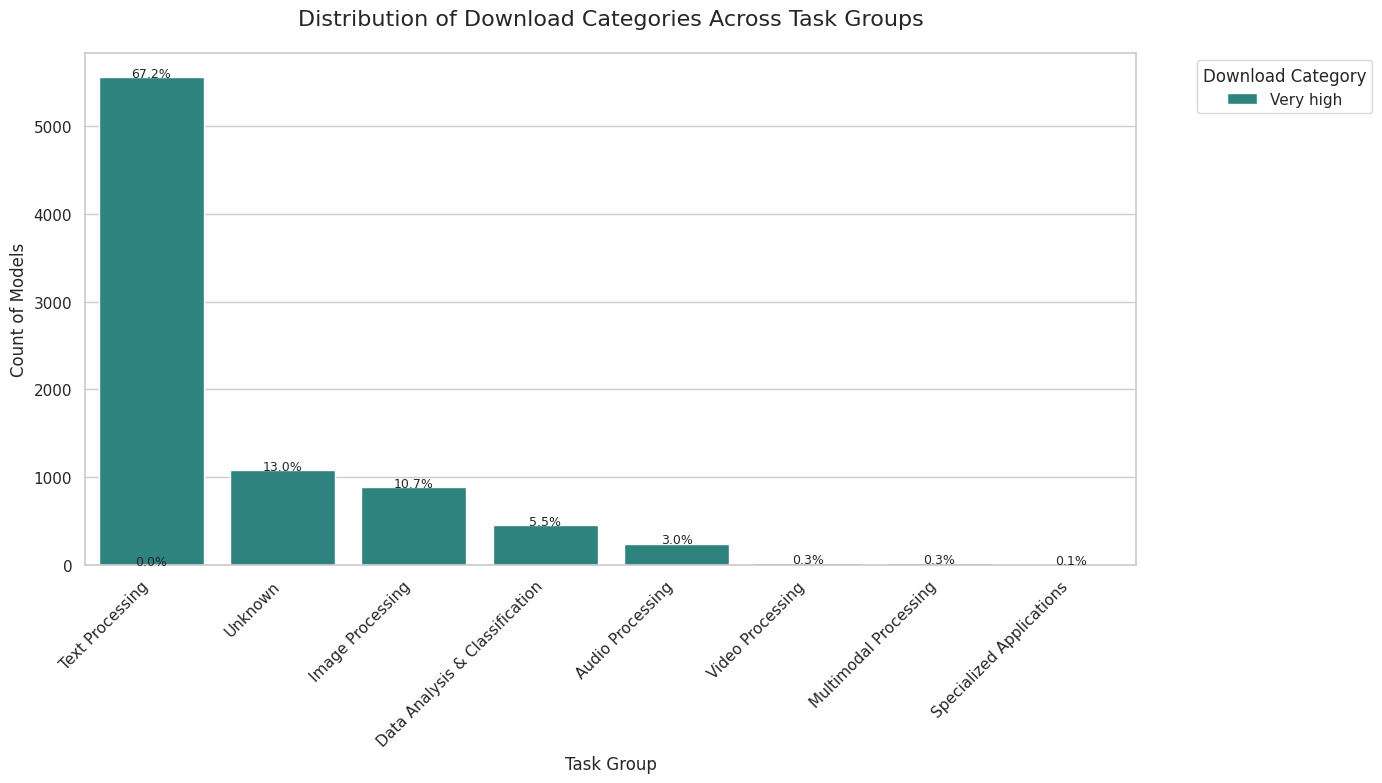

In [32]:
create_distrib(df)

In [35]:
import pandas as pd

def percent_distrib(df):
    categorical_columns = ['task_group', 'author_category', 'language_category', 'downloads_category', 'location']

    for col in categorical_columns:
        print(f"Percentage distribution for {col}:")
        percentages = df[col].value_counts(normalize=True) * 100
        print(percentages.round(2))
        print("\n")

In [36]:
percent_distrib(df)

Percentage distribution for task_group:
task_group
Text Processing                   67.20
Unknown                           13.02
Image Processing                  10.71
Data Analysis & Classification     5.48
Audio Processing                   2.95
Video Processing                   0.28
Multimodal Processing              0.27
Specialized Applications           0.10
Name: proportion, dtype: float64


Percentage distribution for author_category:
author_category
Gold      57.73
Silver    35.64
Bronze     6.63
Name: proportion, dtype: float64


Percentage distribution for language_category:
language_category
High        90.03
Moderate     7.73
Low          2.25
Name: proportion, dtype: float64


Percentage distribution for downloads_category:
downloads_category
Very high    100.0
Name: proportion, dtype: float64


Percentage distribution for location:
location
us    99.85
eu     0.15
Name: proportion, dtype: float64




In [37]:
percent_distrib(gen_data)

Percentage distribution for task_group:
task_group
Text Processing     71.26
Unknown             18.41
Image Processing    10.33
Name: proportion, dtype: float64


Percentage distribution for author_category:
author_category
Gold      60.25
Silver    36.55
Bronze     3.20
Name: proportion, dtype: float64


Percentage distribution for language_category:
language_category
High        91.38
Moderate     8.62
Name: proportion, dtype: float64


Percentage distribution for downloads_category:
downloads_category
Very high    100.0
Name: proportion, dtype: float64


Percentage distribution for location:
location
us    100.0
Name: proportion, dtype: float64




In [3]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')
df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64

In [3]:
import smote_variants as sv

In [6]:
sv.queries.get_multiclass_oversamplers(n_quickest=20)

[smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_bus,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_star,
 smote_variants.oversampling._rose.ROSE,
 smote_variants.oversampling._msmote.MSMOTE,
 smote_variants.oversampling._rwo_sampling.RWO_sampling,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_mesh,
 smote_variants.oversampling._polynom_fit_smote.polynom_fit_SMOTE_poly,
 smote_variants.oversampling._smote.SMOTE,
 smote_variants.oversampling._selected_smote.Selected_SMOTE,
 smote_variants.oversampling._nt_smote.NT_SMOTE,
 smote_variants.oversampling._g_smote.G_SMOTE,
 smote_variants.oversampling._random_smote.Random_SMOTE,
 smote_variants.oversampling._safe_level_smote.Safe_Level_SMOTE,
 smote_variants.oversampling._gaussian_smote.Gaussian_SMOTE,
 smote_variants.oversampling._mct.MCT,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE1,
 smote_variants.oversampling._cure_smote.CURE_SMOTE,
 smote_variants.oversampling.

In [9]:
import ast
df['tags'] = df['tags'].apply(ast.literal_eval)
df['location'] = df['tags'].apply(
    lambda tags: next((tag.split(':', 1)[1] for tag in tags if tag.startswith('region:')), None)
)

In [ ]:
target = 'downloads_category'
features = ['task_group', 'author_category', 'language_category', 'location']

X, y= df[features], df[target]
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=features, drop_first=True)
# Check the distribution of the target variable
print(y.value_counts())

oversampler= sv.MulticlassOversampling(oversampler='distant',
                                      oversampler_params={'random_state': 5})

# X_samp and y_samp contain the oversampled dataset
X_samp, y_samp= oversampler.sample(X, y)

2025-04-02 14:06:32,091:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive


downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64


2025-04-02 14:06:33,142:INFO:MulticlassOversampling: Sampling minority class with label: Low
2025-04-02 14:06:33,332:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:06:33,386:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE'}")
2025-04-02 14:06:34,757:INFO:MulticlassOversampling: Sampling minority class with label: Mid
2025-04-02 14:06:34,986:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.48903323976240404, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:06:35,066:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.48903323976240404, 'topology': 'bus', 'random_state': 5, 'class_name': 'polynom_fit_SMOTE'}")
2025-04-02

In [5]:
np.unique(y_samp, return_counts=True)

(array(['High', 'Low', 'Mid', 'Very Low'], dtype=object),
 array([849241, 814900, 856659, 867712]))

In [6]:
oversampler = sv.polynom_fit_SMOTE_bus()
oversampler.sample(X,y)

2025-04-02 14:08:53,205:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2025-04-02 14:08:54,130:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.83333333, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.88888889, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.94444444, 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array(['Very Low', 'Very Low', 'Very Low', ..., 'High', 'High', 'High'],
       dtype=object))

In [7]:
np.unique(y_samp, return_counts=True)

(array(['High', 'Low', 'Mid', 'Very Low'], dtype=object),
 array([849241, 814900, 856659, 867712]))

In [3]:
df = pd.read_csv('data/hf_models_withmodelcard_nov2024.csv')[['downloads_category', 'task_group', 'author_category', 'language_category', 'location']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191759 entries, 0 to 1191758
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   downloads_category  1191759 non-null  object
 1   task_group          1191759 non-null  object
 2   author_category     1191759 non-null  object
 3   language_category   1191759 non-null  object
 4   location            1191759 non-null  object
dtypes: object(5)
memory usage: 45.5+ MB


In [4]:
df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Mid          37247
High         15166
Name: count, dtype: int64

In [5]:
sub_df = df[df.downloads_category.isin(['Very Low', 'Low'])].copy()
sub_df.downloads_category.value_counts()

downloads_category
Very Low    867712
Low         271634
Name: count, dtype: int64

In [ ]:
oversampler = sv.kmeans_SMOTE()
features = ['task_group', 'author_category', 'language_category', 'location']
target = 'downloads_category'

from sklearn.preprocessing import LabelEncoder
def preprocess_data(df, features, target):
    """
    Preprocess the data:
     - One-hot encode the features to get numeric columns.
     - Label encode the target if necessary.
     - Return processed X and y.
    """
    # One-hot encode the predictor columns
    X = pd.get_dummies(df[features], drop_first=True)
    
    # Label encode the target column if it's not numeric
    if df[target].dtype == 'object':
        le = LabelEncoder()
        y = le.fit_transform(df[target])
    else:
        y = df[target].values

    return X, y

X, y = preprocess_data(sub_df, features, target)

# Ensure that X and y are numpy arrays, as some oversamplers require this format
X_array = X.to_numpy()
y_array = np.array(y)

# Perform oversampling
X_samp, y_samp = oversampler.sample(X_array.astype(int), y_array)

# Convert the oversampled data back to a DataFrame for consistency
X_samp = pd.DataFrame(X_samp, columns=X.columns)


2025-04-17 21:14:37,181:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'kmeans_SMOTE'}")


In [10]:
sv.queries.get_multiclass_oversamplers()

[smote_variants.oversampling._a_suwo.A_SUWO,
 smote_variants.oversampling._adasyn.ADASYN,
 smote_variants.oversampling._adg.ADG,
 smote_variants.oversampling._and_smote.AND_SMOTE,
 smote_variants.oversampling._ans.ANS,
 smote_variants.oversampling._asmobd.ASMOBD,
 smote_variants.oversampling._assembled_smote.Assembled_SMOTE,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE1,
 smote_variants.oversampling._borderline_smote.Borderline_SMOTE2,
 smote_variants.oversampling._cbso.CBSO,
 smote_variants.oversampling._ccr.CCR,
 smote_variants.oversampling._ce_smote.CE_SMOTE,
 smote_variants.oversampling._cluster_smote.cluster_SMOTE,
 smote_variants.oversampling._cure_smote.CURE_SMOTE,
 smote_variants.oversampling._dbsmote.DBSMOTE,
 smote_variants.oversampling._deago.DEAGO,
 smote_variants.oversampling._distance_smote.distance_SMOTE,
 smote_variants.oversampling._dsrbf.DSRBF,
 smote_variants.oversampling._edge_det_smote.Edge_Det_SMOTE,
 smote_variants.oversampling._g_smote.G_SMOTE

2025-04-18 13:43:15,062:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2025-04-18 13:43:15,991:INFO:MulticlassOversampling: Sampling minority class with label: Low
2025-04-18 13:43:16,098:INFO:kmeans_SMOTE: Running sampling via ('kmeans_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_clusters': 10, 'irt': 2.0, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'kmeans_SMOTE'}")


KeyboardInterrupt: 